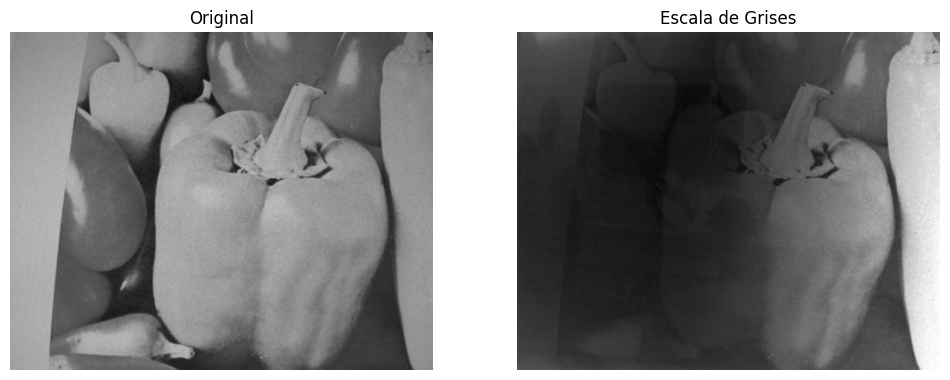

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# leer la imagen de Baboo original
imagen_original = cv2.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/Imagenes_Nuevas/pimientos/pimientos_original.bmp")
imagen_original_gris = cv2.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/Imagenes_Nuevas/pimientos/pimientos_imagen.bmp",)
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_lenna_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)
imagen_gris = cv2.cvtColor(imagen_original_gris, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original, cmap="gray")
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')
         
plt.show()

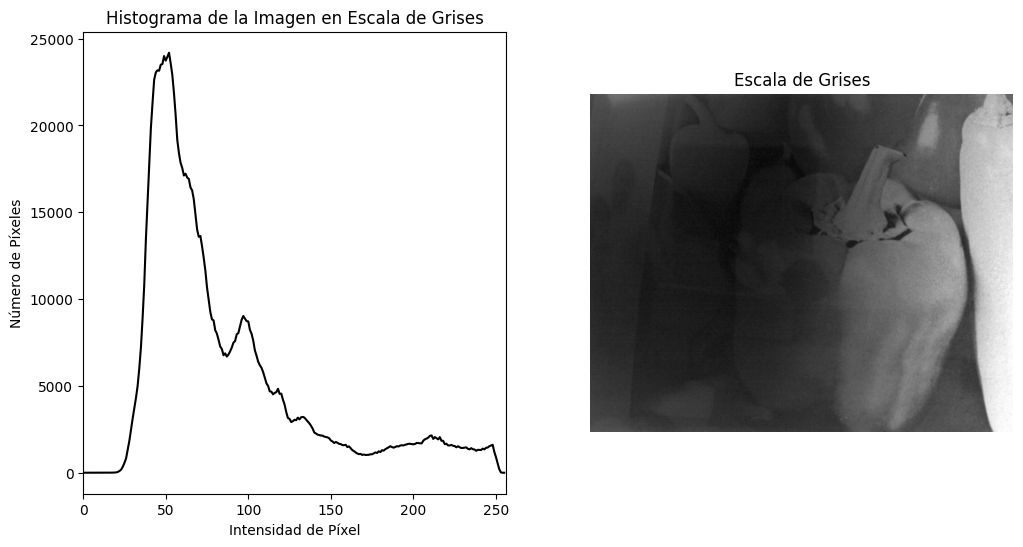

In [2]:
# Calcular el histograma de la imagen en escala de grises
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma, color='black')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

plt.show()

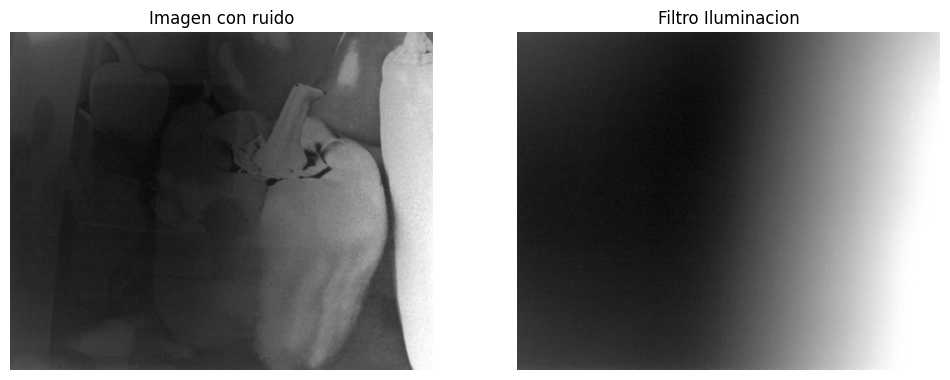

In [3]:
# A continuación obtendremos nuestra h_estimada(x,y) que será la imagen aplicando un FPA (filtro pasa altas), de ahora en adelante h_estimada(x,y) será imagen_filtrada
imagen_con_ruido = imagen_gris

# Operación de convolución 2D entre el filtro y la imagen
# Se utiliza la función filter 2D de OpenCV
# El par de imagen_filtrada será h(x,y)
imagen_filtrada = cv2.imread("C:/Users/luisl/OneDrive/Documentos/GitHub/Restauracion_Imagenes/Experimentos_Reales/Imagenes_Nuevas/lenna/iluminacion_lenna.bmp")
imagen_filtrada = cv2.cvtColor(imagen_filtrada, cv2.COLOR_RGB2GRAY)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con ruido")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap="gray")
plt.title("Filtro Iluminacion")
plt.axis('off')

plt.show()

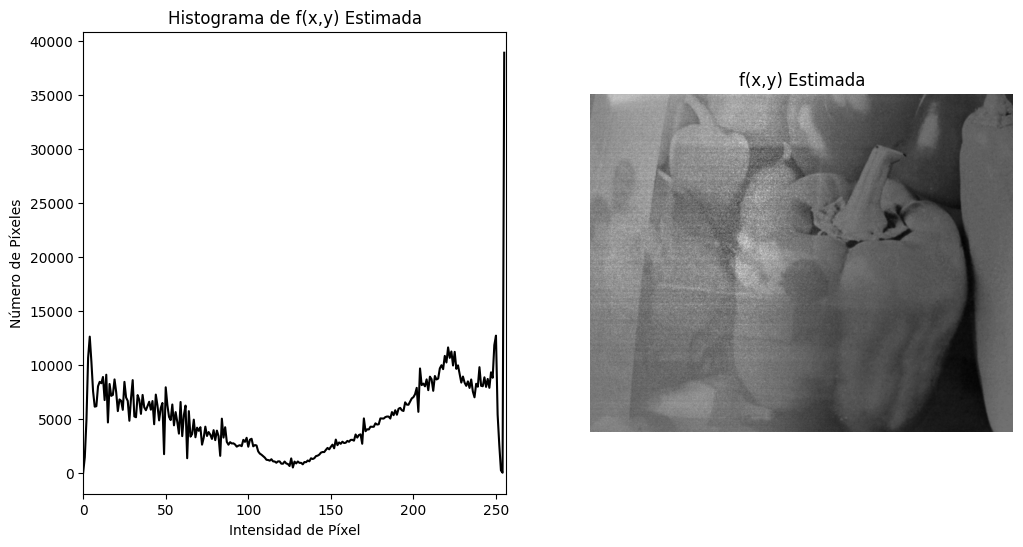

In [4]:
import cv2
import matplotlib.pyplot as plt

# Convertir las imágenes a flotantes
imagen_con_ruido_float = imagen_con_ruido.astype(float)
imagen_filtrada_float = imagen_filtrada.astype(float)

# Realizar la división de las imágenes
f_estimada = cv2.divide(imagen_con_ruido_float, imagen_filtrada_float, scale=255)

# Calcular el histograma de f_estimada
histograma_f_estimada = cv2.calcHist([f_estimada.astype('uint8')], [0], None, [256], [0, 256])

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_f_estimada, color='black')
plt.title("Histograma de f(x,y) Estimada")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

plt.show()

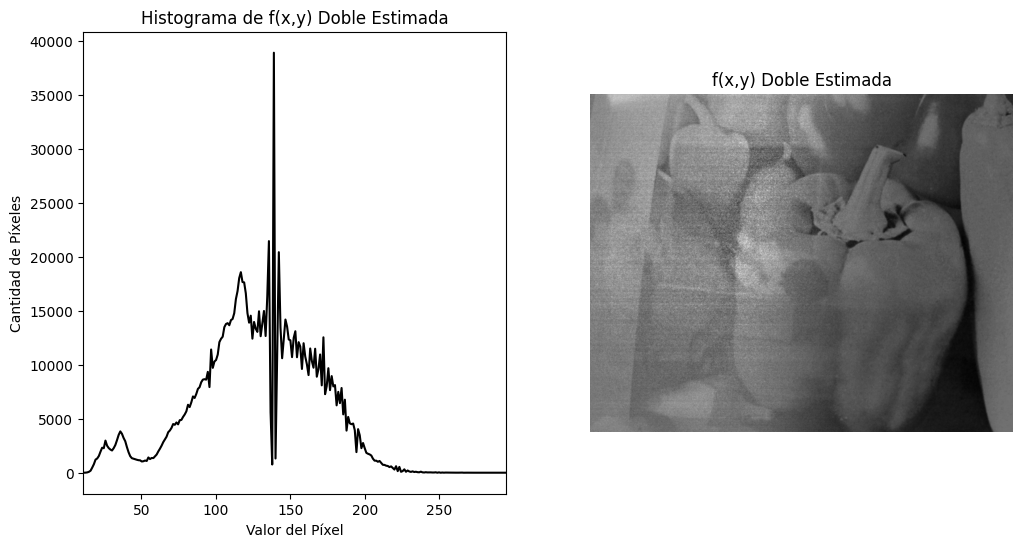

In [5]:
# A continuación realiazremos una normalización de nuestra f_estimada utilizando la media y desviación estandar de nuestra f(x,y)

# Se calcula la media y desviación estandar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_lenna_gris)

#print(f"Media g(x,y): {media_observada[0][0]}")
#print(f"Desviación estándar g(x,y): {desviacionEstandar_observada[0][0]} \n\n")

# Se calcula la media y desviación estandar de f(x,y) estimada
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(f_estimada)

#print(f"Media f(x,y) estimada: {media_pruebaUno[0][0]}")
#print(f"Desviación f(x,y) estimada: {desviacionEstandar_pruebaUno[0][0]}")

f_dobleEstimada = ((f_estimada - media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

#print(f"F doble estimada es {f_dobleEstimada}")

conteos, bordes_bins = np.histogram(f_dobleEstimada.flatten(), bins=256, range=[np.min(f_dobleEstimada), np.max(f_dobleEstimada)])
centros_bins = (bordes_bins[:-1] + bordes_bins[1:]) / 2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(centros_bins, conteos, color='black')
plt.title("Histograma de f(x,y) Doble Estimada")
plt.xlabel("Valor del Píxel")
plt.ylabel("Cantidad de Píxeles")
# Ajusta los límites del eje x para que coincidan con el rango de datos de la imagen flotante
plt.xlim([np.min(f_dobleEstimada), np.max(f_dobleEstimada)])

# Ahora, muestra la imagen f_dobleEstimada en formato float64
plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap='gray', vmin=np.min(f_dobleEstimada), vmax=np.max(f_dobleEstimada))
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

plt.show()

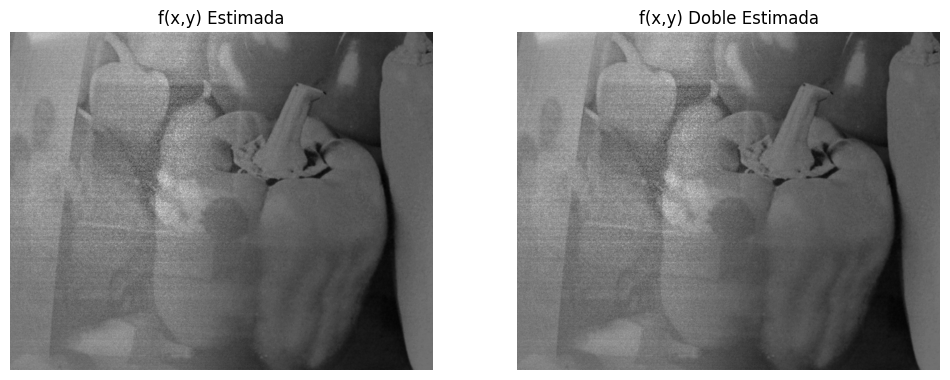

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap="gray")
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

plt.show()

In [7]:
# Aplicamos el RMSE como criterio de comparación

# Se calcula RMSE entre g(x,y) y f_estimada
if f_estimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse1 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_estimada(x,y) y g(x,y) es: {rmse1}")

# Se calcula RMSE entre g(x,y) y f_doble_estimada
if f_dobleEstimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse2 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: {rmse2}")

El RMSE entre f_estimada(x,y) y g(x,y) es: 84.35183715820312
El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: 84.35183715820312


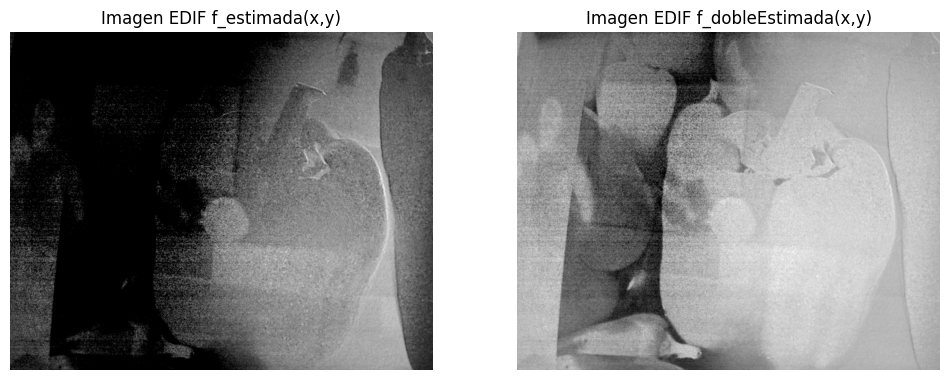

In [8]:
# Aplicamos el EDIF como criterio de comparación

plt.figure(figsize=(12, 6))

# Calcular y mostrar EDIF para f_estimada
diferencia1 = imagen_lenna_gris.astype(np.float32) - f_estimada.astype(np.float32)
c1 = 1
c2 = 128
edif1 = c1 * diferencia1 + c2
edif1_visual = np.clip(edif1, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(edif1_visual, cmap='gray')
plt.title('Imagen EDIF f_estimada(x,y)')
plt.axis('off')

# Calcular y mostrar EDIF para f_dobleEstimada
diferencia2 = imagen_lenna_gris.astype(np.float32) - f_dobleEstimada.astype(np.float32)
edif2 = c1 * diferencia2 + c2
edif2_visual = np.clip(edif2, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(edif2_visual, cmap='gray')
plt.title('Imagen EDIF f_dobleEstimada(x,y)')
plt.axis('off')

plt.show()

In [9]:
# Aplicamos el SNR como criterio de comparación

imagen_gris_float = imagen_gris.astype(np.float32)
f_estimada_float = f_estimada.astype(np.float32)
f_dobleEstimada_float = f_dobleEstimada.astype(np.float32)

numerador = np.sum(imagen_gris_float ** 2)
denominador = np.sum((imagen_gris_float - f_estimada_float) ** 2)
denominador2 = np.sum((imagen_gris_float - f_dobleEstimada_float) ** 2)

snr1 = numerador / denominador

print(f"El SNR para f_estimada es: {snr1}")

snr2 = numerador / denominador2

print(f"El SNR para f_dobleEstimada es: {snr2}")

El SNR para f_estimada es: 0.3168109953403473
El SNR para f_dobleEstimada es: 1.3856257200241089


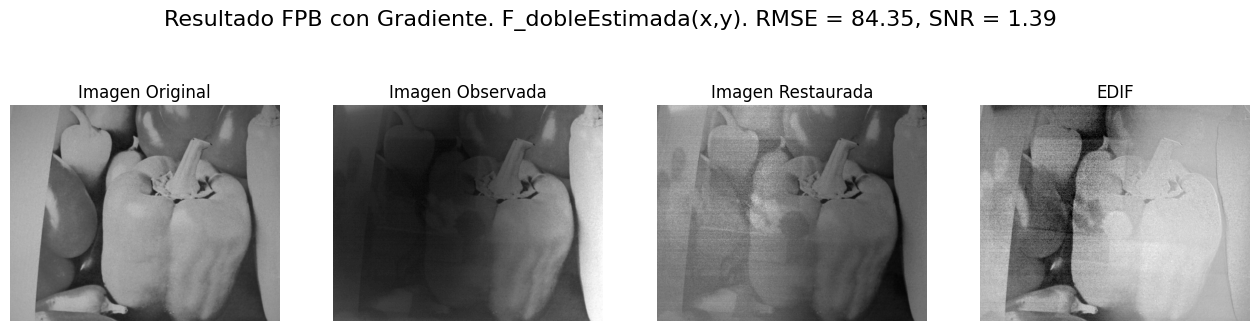

In [10]:
# Comparación de avances

plt.figure(figsize=(16, 8))

plt.suptitle(f"Resultado FPB con Gradiente. F_dobleEstimada(x,y). RMSE = {rmse2:.2f}, SNR = {snr2:.2f}", fontsize=16, y=0.75)

plt.subplot(1, 4, 1)
plt.imshow(imagen_original, cmap="gray")
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen Observada")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(f_dobleEstimada, cmap="gray")
plt.title("Imagen Restaurada")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edif2_visual, cmap="gray")
plt.title("EDIF")
plt.axis('off')

plt.savefig("C:/Users/luisl/OneDrive/Escritorio/Resultados_Lenna", dpi=300, bbox_inches='tight')

plt.show()

###### 